# Data Fetching and Preparation

You can get the data here: 
wget https://dl.fbaipublicfiles.com/fasttext/data/cooking.stackexchange.tar.gz && tar xvzf cooking.stackexchange.tar.gz


In [1]:
# init
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.text import *
import pandas as pd
from pathlib import Path

FN='jrc_topterms_en_svm.csv'

bs = 32

In [ ]:
while True:
    import time
    time.sleep(1)

**Get the dataset**





In [2]:
df_raw = pd.read_csv(FN, delimiter=';')
df_raw.head(2)

,docid,text,11,12,13,14,15,16,17,18,...,8463,8464,8465,8466,8467,8468,8469,8470,8471,8472
0,jrc51976FC0135-en,[ pic ] | COMMISSION OF THE EUROPEAN COMMUNITI...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,jrc31996L0071-en,DIRECTIVE 96 / 71 / EC OF THE EUROPEAN PARLIAM...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
columns = list(df_raw) 
print(len(columns))
## transfrom n hot to simple labels
new_rows = []
for i, j in df_raw.iterrows(): 
    labels = [c for c in columns if j[c]==1]
    # (not c.startswith('doc') and not c.startswith('text')
    new_rows.append( (j['text'], ';'.join(labels)) )

df = pd.DataFrame(new_rows)
df.columns = ['text', 'labels']

df.head(100)


8464


,text,labels
0,[ pic ] | COMMISSION OF THE EUROPEAN COMMUNITI...,525;2181;3160;4515
1,DIRECTIVE 96 / 71 / EC OF THE EUROPEAN PARLIAM...,82;557;813;1802;3209;5985
2,COMMISSION REGULATION ( EC ) No 1147 / 96 of 2...,181;343;1415;2479;2737
3,COMMISSION DECISION of 11 October 1996 laying ...,614;1372;2320;3156;5778
4,COMMISSION DECISION of 11 October 1996 laying ...,614;1372;2320;3156;5083
5,COUNCIL DIRECTIVE 96 / 24 / EC of 29 April 199...,13;87;525;614;656;1277
6,COMMISSION DIRECTIVE 96 / 68 / EC of 21 Octobe...,82;656;1415;2014;2479;4303
7,COUNCIL DIRECTIVE 96 / 61 / EC of 24 September...,1158;1707;2470;2524
8,COMMISSION DECISION of 17 October 1996 amendin...,614;2442;2736;2737;3489;5962
9,COUNCIL DIRECTIVE 96 / 29 / EURATOM of 13 May ...,82;1412;2479;3946


In [12]:
df.head(100)

,text,labels
0,[ pic ] | COMMISSION OF THE EUROPEAN COMMUNITI...,525;2181;3160;4515
1,DIRECTIVE 96 / 71 / EC OF THE EUROPEAN PARLIAM...,82;557;813;1802;3209;5985
2,COMMISSION REGULATION ( EC ) No 1147 / 96 of 2...,181;343;1415;2479;2737
3,COMMISSION DECISION of 11 October 1996 laying ...,614;1372;2320;3156;5778
4,COMMISSION DECISION of 11 October 1996 laying ...,614;1372;2320;3156;5083
5,COUNCIL DIRECTIVE 96 / 24 / EC of 29 April 199...,13;87;525;614;656;1277
6,COMMISSION DIRECTIVE 96 / 68 / EC of 21 Octobe...,82;656;1415;2014;2479;4303
7,COUNCIL DIRECTIVE 96 / 61 / EC of 24 September...,1158;1707;2470;2524
8,COMMISSION DECISION of 17 October 1996 amendin...,614;2442;2736;2737;3489;5962
9,COUNCIL DIRECTIVE 96 / 29 / EURATOM of 13 May ...,82;1412;2479;3946


In [15]:
FN = 'converted_filtered.csv'
df.to_csv(FN)


## Reuse Fine-tuned of the language model from "JRC_basic" folder


In [16]:
data_lm = load_data(Path('.'), 'data_lm.pkl', bs=bs)

/home/wohlg/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


## Train a classifier

As we are using multi-label classification, we define our own metrics (fastai doesn't support multi-label well yet)

In [17]:
def my_prc(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(pred_pos.sum() + epsilon))#.item()
  
def my_rec(log_preds, targs, thresh=0.5, epsilon=1e-8):
    pred_pos = (log_preds > thresh).float()
    tpos = torch.mul((targs == pred_pos).float(), targs.float())
    return (tpos.sum()/(targs.sum() + epsilon))

thresh=0.001
acc_0001 = partial(accuracy_thresh, thresh=thresh)
prc_0001 = partial(my_prc, thresh=thresh)
rec_0001 = partial(my_rec, thresh=thresh)
f_0001 = partial(fbeta, thresh=thresh, beta=1)


thresh=0.01
acc_001 = partial(accuracy_thresh, thresh=thresh)
prc_001 = partial(my_prc, thresh=thresh)
rec_001 = partial(my_rec, thresh=thresh)
f_001 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.05
acc_005 = partial(accuracy_thresh, thresh=thresh)
prc_005 = partial(my_prc, thresh=thresh)
rec_005 = partial(my_rec, thresh=thresh)
f_005 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.1
acc_01 = partial(accuracy_thresh, thresh=thresh)
prc_01 = partial(my_prc, thresh=thresh)
rec_01 = partial(my_rec, thresh=thresh)
f_01 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.2
acc_02 = partial(accuracy_thresh, thresh=thresh)
prc_02 = partial(my_prc, thresh=thresh)
rec_02 = partial(my_rec, thresh=thresh)
f_02 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.3
acc_03 = partial(accuracy_thresh, thresh=thresh)
prc_03 = partial(my_prc, thresh=thresh)
rec_03 = partial(my_rec, thresh=thresh)
f_03 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.4
acc_04 = partial(accuracy_thresh, thresh=thresh)
prc_04 = partial(my_prc, thresh=thresh)
rec_04 = partial(my_rec, thresh=thresh)
f_04 = partial(fbeta, thresh=thresh, beta=1)

thresh=0.5
acc_05 = partial(accuracy_thresh, thresh=thresh)
prc_05 = partial(my_prc, thresh=thresh)
rec_05 = partial(my_rec, thresh=thresh)
f_05 = partial(fbeta, thresh=thresh, beta=1)


In [18]:
print(FN)

converted_filtered.csv


In [19]:
data_clas = (TextList.from_csv(Path('.'), FN, vocab=data_lm.vocab, cols='text')
             #grab all the text files in path
             #wohlg: .split_by_folder(valid='test')
             .split_by_rand_pct()
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)             
             #wohlg: .label_from_folder(classes=['neg', 'pos'])
             .label_from_df(cols='labels', label_delim=';')
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [20]:
print(len(data_lm.vocab.itos))
print(data_lm.vocab.itos[:20])

60000
['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', 'the', ',', 'of', '|', '.', 'and', 'to', 'in', ')', '(', '-']


In [21]:
data_clas = load_data(Path('.'), 'data_clas.pkl', bs=bs)

In [22]:
data_clas.show_batch()

text,target
xxbos xxup section xxup iii xxup commission xxup contents xxup volume xxup ii — xxup section xxup iii : xxup commission — xxmaj title 3 : xxmaj surpluses available — xxmaj title 4 : xxmaj revenue accruing from persons working with the institutions and other xxmaj community bodies — xxmaj title 5 : xxmaj revenue accruing from the administrative operation of the institution — xxmaj title 6 : xxmaj contributions,929
xxbos xxup court xxup of xxup auditors xxmaj in accordance with the provisions of the xxmaj treaties ( xxmaj article 248 ( 4 ) of the xxup ec xxmaj treaty and xxmaj article 160c ( 4 ) of the xxup eaec treaty ) and xxmaj articles 143 and 181 ( 2 ) of the xxmaj financial xxmaj regulation of 25 xxmaj june 2002 applicable to the general budget of the,1451;486;929
"xxbos xxmaj commission xxmaj regulation ( xxup ec ) xxmaj no 1549 / 2006 of 17 xxmaj october 2006 amending xxmaj annex i to xxmaj council xxmaj regulation ( xxup eec ) xxmaj no 2658 / 87 on the tariff and statistical nomenclature and on the xxmaj common xxmaj customs xxmaj tariff xxup the xxup commission xxup of xxup the xxup european xxup communities , xxmaj having regard to the",2520;3156;4380
"xxbos xxup council xxup regulation ( xxup ec ) xxmaj no 2223 / 96 of 25 xxmaj june 1996 on the xxmaj european system of national and regional accounts in the xxmaj community xxup the xxup council xxup of xxup the xxup european xxup union , xxmaj having regard to the xxmaj treaty establishing the xxmaj european xxmaj community , and in particular xxmaj article 213 thereof , xxmaj having",2472;4256;4361;4362;4602;5769
"xxbos xxmaj commission xxmaj directive 2001 / 59 / xxup ec of 6 xxmaj august 2001 adapting to technical progress for the 28th time xxmaj council xxmaj directive 67 / 548 / xxup eec on the approximation of the laws , regulations and administrative provisions relating to the classification , packaging and labelling of dangerous substances ( xxmaj text with xxup eea relevance ) xxup the xxup commission xxup of",2090;494;525;87


In [23]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, wd=0.1)
#learn.metrics = [accuracy_thresh, custom_precision, custom_recall, 
#                 acc_01, f_score_01, acc_02, f_score_02, acc_03, f_score_03 ]
learn.metrics = [accuracy_thresh, 
                 acc_0001, prc_0001, rec_0001, f_0001,
                 acc_001, prc_001, rec_001, f_001,
                 acc_005, prc_005, rec_005, f_005,
                 acc_01, prc_01, rec_01, f_01,
                 acc_02, prc_02, rec_02, f_02,
                 acc_03, prc_03, rec_03, f_03,
                 acc_04, prc_04, rec_04, f_04,
                 acc_05, prc_05, rec_05, f_05 ]
#!mv *pth models
learn.load_encoder('fine_tuned_enc-JRC')


In [35]:
print(learn.loss_func)
print(learn.loss_func.func)

FlattenedLoss of BCEWithLogitsLoss()
BCEWithLogitsLoss()


In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


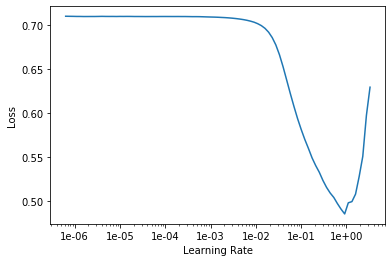

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, slice(1e-1,1e-1), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.043391,0.044592,0.990753,0.166687,0.570611,0.082194,0.022987,0.688261,0.574665,0.081864,0.052964,0.920651,0.588782,0.080256,0.126208,0.964988,0.599337,0.078526,0.179808,0.985333,0.620851,0.073304,0.195129,0.989373,0.641800,0.069176,0.164364,0.990407,0.664367,0.064670,0.138876,0.990753,0.678704,0.058186,0.116547,20:12
1,0.038166,0.036018,0.991124,0.446441,0.750119,0.137831,0.036644,0.831873,0.750992,0.137325,0.106028,0.963996,0.756390,0.133915,0.253001,0.983009,0.770165,0.129494,0.317510,0.989714,0.781570,0.122544,0.308774,0.990880,0.797408,0.116275,0.263778,0.991108,0.808918,0.109914,0.221379,0.991124,0.818004,0.104024,0.184701,19:48


## Results:

learn.fit_one_cycle(1, slice(1e-2,1e-1), moms=(0.8,0.7)): 

    0	0.010093	0.008351	0.998479	0.874526	0.052546	46:22 (colab)
    
learn.fit_one_cycle(1, slice(2e-2,2e-1), moms=(0.8,0.7)):

    # old: 0	0.009459	0.008237	0.998506	0.772035	0.062515	19:41
    0	0.009326	0.009061	0.998467	0.719809	0.069594	19:01
    
### preprocessing corpus

learn.fit_one_cycle(1, slice(1e-1,1e-1), moms=(0.8,0.7))  

    first part: 0	0.007484	0.006419	0.998603	0.827936	0.723389	0.184216	0.021517\
    last part: 0.998603	0.794771	0.144744	0.238704	04:38
    


In [27]:
#learn.export()

In [28]:
learn.save('first')

In [29]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (14016 items)
x: TextList
xxbos [ pic ] | xxup commission xxup of xxup the xxup european xxup communities | xxmaj brussels , xxup com ( 2004 ) xxmaj proposal for a xxup directive / / … … xxup ec xxup of xxup the xxup european xxup parliament xxup and xxup of xxup the xxup council of [ ] … on reciprocal recognition of navigability licences for inland waterway vessels ( xxmaj codified version ) xxup explanatory xxup memorandum 1 . xxmaj in the context of a people ’ s xxmaj europe , the xxmaj commission attaches great importance to simplifying and clarifying xxmaj community law so as to make it clearer and more accessible to the ordinary citizen , thus giving him new opportunities and the chance to make use of the specific rights it gives him . xxmaj this aim can not be achieved so long as numerous provisions that have been amended several times , often quite substantially , remain scattered , so that they must be sought partly in the o

Why gradual unfreeze? Give example of Image detection.

In [30]:
learn.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


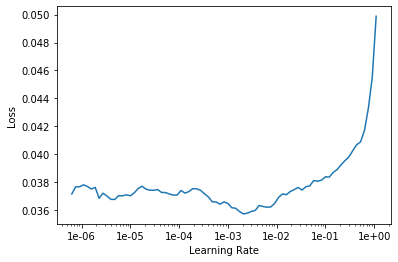

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
# learn.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.034570,0.032363,0.991847,0.526583,0.762461,0.209416,0.048281,0.862248,0.764892,0.208597,0.140198,0.970091,0.772994,0.205296,0.301763,0.985260,0.780219,0.200190,0.367262,0.990410,0.802066,0.191397,0.363628,0.991494,0.813037,0.182963,0.332580,0.991810,0.828061,0.173291,0.299753,0.991847,0.846015,0.165006,0.267034,20:53
1,0.031774,0.031159,0.991982,0.598998,0.707237,0.273672,0.056629,0.883005,0.708594,0.273175,0.164146,0.969969,0.716207,0.270017,0.327198,0.983840,0.722657,0.266289,0.389318,0.989759,0.736571,0.259497,0.405056,0.991252,0.745395,0.251820,0.383657,0.991775,0.758277,0.244221,0.358736,0.991982,0.769740,0.237233,0.333513,20:07


### Results:
    
learn.fit_one_cycle(2, slice(1e-2/(2.6xx4),1e-2), moms=(0.8,0.7)) (after 2e-2,2e-1) in step one:

    epoch	train_loss	valid_loss	accuracy_thresh	custom_precision	custom_recall	time
    0	0.008408	0.083658	0.996215	0.639583	0.135676	19:34
    1	0.007711	0.006891	0.998587	0.751884	0.164432	19:30
    2	0.006967	0.006600	0.998611	0.750787	0.185833	19:47


In [33]:
learn.save('second')

In [34]:
learn.load('second');

In [35]:
learn.freeze_to(-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


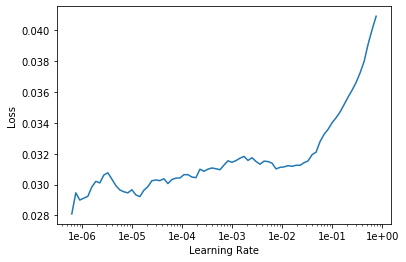

In [36]:
learn.lr_find()
learn.recorder.plot()

In [37]:
#learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
#learn.fit_one_cycle(4, slice(5e-2/(2.6**4),5e-2), moms=(0.8,0.7))
learn.fit_one_cycle(7, slice(2e-3/(2.6**4),2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.031054,0.029302,0.992176,0.592000,0.733251,0.281517,0.056462,0.882915,0.734321,0.280740,0.175140,0.970932,0.740813,0.276895,0.339664,0.984537,0.745727,0.271962,0.404530,0.990148,0.755648,0.263207,0.420147,0.991517,0.770922,0.255007,0.395115,0.991995,0.786656,0.246961,0.370242,0.992176,0.801652,0.239253,0.346232,21:38
1,0.030253,0.028302,0.992346,0.583888,0.765588,0.282496,0.053359,0.881636,0.768099,0.281797,0.172563,0.971106,0.773454,0.278145,0.351602,0.984992,0.781105,0.273090,0.426329,0.990633,0.793206,0.264304,0.441803,0.991953,0.807771,0.256088,0.417943,0.992274,0.820558,0.248399,0.385338,0.992346,0.828583,0.240113,0.353262,21:39
2,0.028871,0.027369,0.992464,0.617150,0.752193,0.310876,0.060101,0.886677,0.752349,0.309991,0.181619,0.970655,0.758673,0.306206,0.365466,0.984506,0.765735,0.301257,0.437798,0.990529,0.781007,0.292480,0.464222,0.991882,0.794194,0.284099,0.438558,0.992358,0.811088,0.275016,0.410448,0.992464,0.825543,0.265906,0.379012,22:10
3,0.028248,0.026509,0.992688,0.648366,0.770056,0.334895,0.065648,0.898767,0.770820,0.333713,0.200228,0.973450,0.772606,0.329046,0.385452,0.985618,0.781196,0.324125,0.459691,0.990909,0.792928,0.314783,0.483106,0.992161,0.805078,0.305529,0.465012,0.992556,0.813848,0.296628,0.435759,0.992688,0.822489,0.287533,0.407537,21:55
4,0.026833,0.025907,0.992791,0.654915,0.771408,0.344698,0.068546,0.899953,0.772851,0.343768,0.208257,0.973894,0.779912,0.340050,0.393950,0.985830,0.787176,0.335011,0.469198,0.991078,0.798624,0.325596,0.494906,0.992346,0.810826,0.315548,0.479041,0.992715,0.822688,0.304556,0.450084,0.992791,0.830183,0.294536,0.418559,21:28
5,0.027053,0.025488,0.992859,0.662658,0.775064,0.351188,0.069832,0.901852,0.777180,0.350281,0.210918,0.973736,0.783423,0.346358,0.399243,0.985766,0.790872,0.341641,0.475458,0.991136,0.804622,0.332411,0.504975,0.992331,0.817773,0.323129,0.487423,0.992760,0.828727,0.312149,0.459648,0.992859,0.835804,0.301608,0.428153,22:00
6,0.026472,0.025603,0.992833,0.663529,0.767240,0.357710,0.068591,0.902743,0.767697,0.356850,0.208788,0.973838,0.776170,0.352982,0.397624,0.985670,0.783034,0.347276,0.474389,0.990976,0.797057,0.337785,0.502518,0.992287,0.810376,0.329036,0.489217,0.992720,0.822887,0.319943,0.462733,0.992833,0.831905,0.308784,0.432470,21:21


### Results:

learn.fit_one_cycle(3, slice(4e-3/(2.6**4),4e-3), moms=(0.8,0.7))

    epoch	train_loss	valid_loss	accuracy_thresh	custom_precision	custom_recall	time
    0	0.007680	0.007027	0.998588	0.773600	0.163029	21:17
    1	0.006924	0.006516	0.998621	0.807463	0.166123	21:11
    2	0.006826	0.006296	0.998640	0.803096	0.191780	21:05
    
    
second run, same settings:


In [38]:
learn.save('third')

In [39]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (14016 items)
x: TextList
xxbos [ pic ] | xxup commission xxup of xxup the xxup european xxup communities | xxmaj brussels , xxup com ( 2004 ) xxmaj proposal for a xxup directive / / … … xxup ec xxup of xxup the xxup european xxup parliament xxup and xxup of xxup the xxup council of [ ] … on reciprocal recognition of navigability licences for inland waterway vessels ( xxmaj codified version ) xxup explanatory xxup memorandum 1 . xxmaj in the context of a people ’ s xxmaj europe , the xxmaj commission attaches great importance to simplifying and clarifying xxmaj community law so as to make it clearer and more accessible to the ordinary citizen , thus giving him new opportunities and the chance to make use of the specific rights it gives him . xxmaj this aim can not be achieved so long as numerous provisions that have been amended several times , often quite substantially , remain scattered , so that they must be sought partly in the o

In [40]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


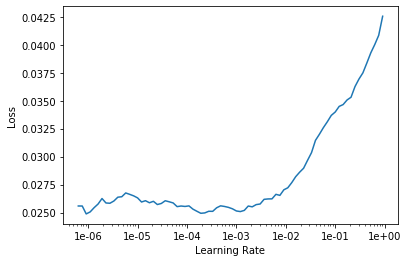

In [41]:
learn.lr_find()
learn.recorder.plot()

In [42]:
#learn.fit_one_cycle(15, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7)) ## too much??? but in the end it comes in nicely ..
learn.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7)) ## too much??? but in the end it comes in nicely ..
#learn.fit_one_cycle(15, slice(7e-3/(2.6**4),7e-3), moms=(0.8,0.7)) ## works well
#learn.fit_one_cycle(2, slice(3e-4/(2.6**4),3e-4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,accuracy_thresh,my_prc,my_rec,fbeta,time
0,0.025795,0.027710,0.992492,0.666616,0.765395,0.360461,0.072177,0.901810,0.766795,0.359356,0.213316,0.973312,0.771281,0.354773,0.400151,0.985118,0.778954,0.349773,0.473953,0.990501,0.792265,0.339677,0.503990,0.991828,0.805167,0.329356,0.489466,0.992309,0.818207,0.319912,0.461774,0.992492,0.828970,0.310988,0.433292,23:21
1,0.026656,0.025749,0.992853,0.669700,0.768558,0.364649,0.071118,0.902858,0.770247,0.363727,0.212386,0.973398,0.775096,0.359404,0.398592,0.985393,0.784285,0.354559,0.476537,0.990831,0.795701,0.343911,0.504425,0.992183,0.809018,0.333596,0.489081,0.992681,0.818666,0.324160,0.465050,0.992853,0.830945,0.313319,0.437881,23:28
2,0.026685,0.025092,0.992971,0.677992,0.773042,0.371899,0.075261,0.905113,0.773550,0.370907,0.217918,0.973675,0.781545,0.367572,0.402321,0.985548,0.787798,0.362602,0.482785,0.991000,0.801498,0.352654,0.516136,0.992376,0.814134,0.341699,0.501678,0.992829,0.827106,0.330606,0.478134,0.992971,0.837539,0.320903,0.448771,23:06
3,0.026394,0.024838,0.993019,0.682371,0.772238,0.379936,0.075740,0.906489,0.773442,0.378677,0.223242,0.974009,0.780151,0.374895,0.408900,0.985625,0.786698,0.368922,0.484662,0.990994,0.798265,0.358293,0.516122,0.992390,0.809808,0.348355,0.505737,0.992890,0.823292,0.338027,0.485358,0.993019,0.832214,0.329565,0.456846,22:41
4,0.024260,0.024426,0.993132,0.672163,0.801968,0.371747,0.071645,0.906850,0.802762,0.370746,0.221150,0.975098,0.806583,0.366498,0.416772,0.986553,0.813062,0.360795,0.500758,0.991539,0.824713,0.348986,0.532390,0.992714,0.835012,0.338021,0.514776,0.993089,0.849056,0.327290,0.486297,0.993132,0.859738,0.317775,0.454480,23:16
5,0.024974,0.024454,0.993132,0.705316,0.776355,0.392801,0.081015,0.914509,0.778045,0.392440,0.232577,0.975832,0.781413,0.389011,0.423776,0.986362,0.785650,0.384694,0.500828,0.991301,0.796168,0.373665,0.535653,0.992605,0.806731,0.362661,0.525653,0.993007,0.821507,0.353356,0.497647,0.993132,0.833750,0.344085,0.469806,23:15
6,0.024479,0.023816,0.993238,0.700083,0.784581,0.400301,0.079163,0.912914,0.786033,0.399245,0.235465,0.975462,0.791912,0.395318,0.424649,0.986185,0.799550,0.389768,0.503693,0.991313,0.810180,0.379714,0.543934,0.992686,0.821119,0.369052,0.534712,0.993126,0.830414,0.359429,0.508866,0.993238,0.838842,0.349451,0.479568,23:17
7,0.023278,0.023657,0.993272,0.706878,0.790649,0.400026,0.078619,0.916458,0.791250,0.399122,0.236023,0.976578,0.797974,0.395010,0.432768,0.986769,0.803168,0.389377,0.512107,0.991507,0.813385,0.378637,0.546552,0.992796,0.823704,0.368259,0.535777,0.993186,0.834384,0.359642,0.509477,0.993272,0.842665,0.348989,0.479634,22:38
8,0.022561,0.023743,0.993258,0.702324,0.791127,0.396785,0.078962,0.914968,0.792613,0.395955,0.234104,0.976338,0.796764,0.391951,0.431183,0.986714,0.801629,0.386661,0.510264,0.991509,0.813417,0.375101,0.543882,0.992791,0.822814,0.365118,0.533329,0.993186,0.834196,0.355551,0.507333,0.993258,0.846361,0.346343,0.476200,23:24
9,0.023494,0.023590,0.993269,0.701551,0.795641,0.395719,0.080186,0.914855,0.796866,0.394590,0.241200,0.976581,0.802600,0.390973,0.435477,0.986862,0.809184,0.385762,0.514671,0.991604,0.817957,0.375254,0.546655,0.992859,0.829105,0.364883,0.535020,0.993190,0.839926,0.354037,0.505861,0.993269,0.849968,0.344483,0.475751,22:39


In [43]:
learn.save('final')

## Evaluate the results
Based on: https://www.kaggle.com/nadjetba/text-to-meaning-with-multi-label-classification?scriptVersionId=12686831

In [44]:
# Predict on the validation dataset
y_pred, y_true =  learn.get_preds()


In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import classification_report

In [52]:
thresh = 0.27


print("F1 (micro)", f1_score(y_true, y_pred>thresh, average='micro'))
print("P (micro)", precision_score(y_true, y_pred>thresh, average='micro'))
print("R (micro)", recall_score(y_true, y_pred>thresh, average='micro'))

print("\nF1 (macro)", f1_score(y_true, y_pred>thresh, average='macro'))
print("P (macro)", precision_score(y_true, y_pred>thresh, average='macro'))
print("R (macro) ", recall_score(y_true, y_pred>thresh, average='macro'))


F1 (micro) 0.5635851222991546
P (micro) 0.6403383934218849
R (micro) 0.5032622879512831

F1 (macro) 0.21234956131551944
P (macro) 0.2806824658592331
R (macro)  0.19761587754826215


## results:

without preprocessing -- 1st run:
  
    F1 (micro) 0.6693270575394794
    P (micro) 0.7342113139778509
    R (micro) 0.6149796302099655

    F1 (macro) 0.3890770790857555
    P (macro) 0.501579476235325
    R (macro)  0.34791195267245517




    

In [ ]:
f1_score(y_true, y_pred>thresh, average='macro')

In [ ]:
y_true = y_true.numpy()
scores = y_pred.numpy()
scores.shape, y_true.shape

#### metrics = classification_report(y_true, scores>thresh, target_names=data_clas.valid_ds.classes)
print(metrics)